# ノイズとバイアスの除去

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lpf

◼️lpfパッケージのローパスフィルタ(lpfilter)のマニュアル：

In [2]:
lpf.lpfilter?

Signature: lpf.lpfilter(fl, cutoff_hz, samp_hz=1000, init=0, rmdc=True, istime=False)
Docstring:
Retern ローパスフィルターを施した1D-numpy配列(デフォルト). 
    istime=True を指定すると2D-numpy配列(Parameters istime を参照).
    *) initで指定した時刻から数えて最大の2^n個のデータを残し, 残りのデータは削除される.
    
Parameters
----------
fl : array like
    サンプリングデータ配列. 1D-numpy配列.
cutoff_hz : int
    ローパスフィルターのカットオフ周波数.
samp_hz : int, optional (1000)
    サンプル周波数. デフォルトで1000[Hz].
init : int or float, optional
    初期時刻[sec]. デフォルトでは0[sec]. 
rmdc : bool, optional (True)
    直流成分(バイアス)を取り除くか否か. デフォルトではTrue(取り除く).
istime : bool, optional (False)
    istime=Trueで時刻と遂になった2D-numpy配列を返す. shapeは(2^n, 2).
File:      ~/notebook/Python/grad-analyses-2018/lpf.py
Type:      function


◼️センサデータの読み込み：

In [3]:
df = pd.read_csv('2018-03-02_141216.564.csv', header=None, 
                names = ['items','time','acc_x','acc_y','acc_z','omega_x','omega_y','omega_z'])

In [4]:
df.head()

,items,time,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
0,ags,51136678,9701,380,1699,208,-16,-37
1,ags,51136679,9704,407,1605,202,-4,-24
2,ags,51136680,9696,387,1639,196,-10,-24
3,ags,51136681,9696,424,1670,190,2,-30
4,ags,51136682,9738,448,1699,190,-16,-37


◼️データフレームからomega_xを取り出し，1D-numpy配列yに変換. ただし，`lpf._cutdata4fft`で$2^n$個のデータ数に切る。

In [5]:
x = np.array(df['omega_x'])
x0 = lpf._cutdata4fft(x)
x0

array([208, 202, 196, ...,  32,  26,  19])

◼️x1にバイアスありのフィルタリングデータ，x2にバイアスカットのフィルタリングデータ：
> どちらもカットオフ周波数20

In [10]:
x1 = lpf.lpfilter(x, 20, rmdc=False)
x2 = lpf.lpfilter(x, 20)

In [11]:
print(f'x0のバイアス:{np.mean(x0)}')
print(f'x1のバイアス:{np.mean(x1)}')
print(f'x2のバイアス:{np.mean(x2)}')

x0のバイアス:36.683868408203125
x1のバイアス:36.683868408203125
x2のバイアス:2.220446049250313e-16


◼️データポイントを10秒点からから11秒点までを定義する：

In [12]:
startpoint = 10000
endpoint = 11001

◼️x0のデータのグラフ：

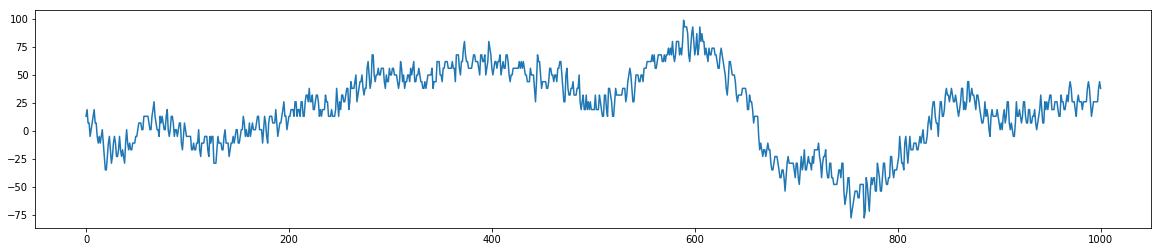

In [13]:
plt.figure(figsize=(20,4))
plt.plot(x0[startpoint:endpoint])

◼️x0(赤)とx1(青)のデータのグラフ：

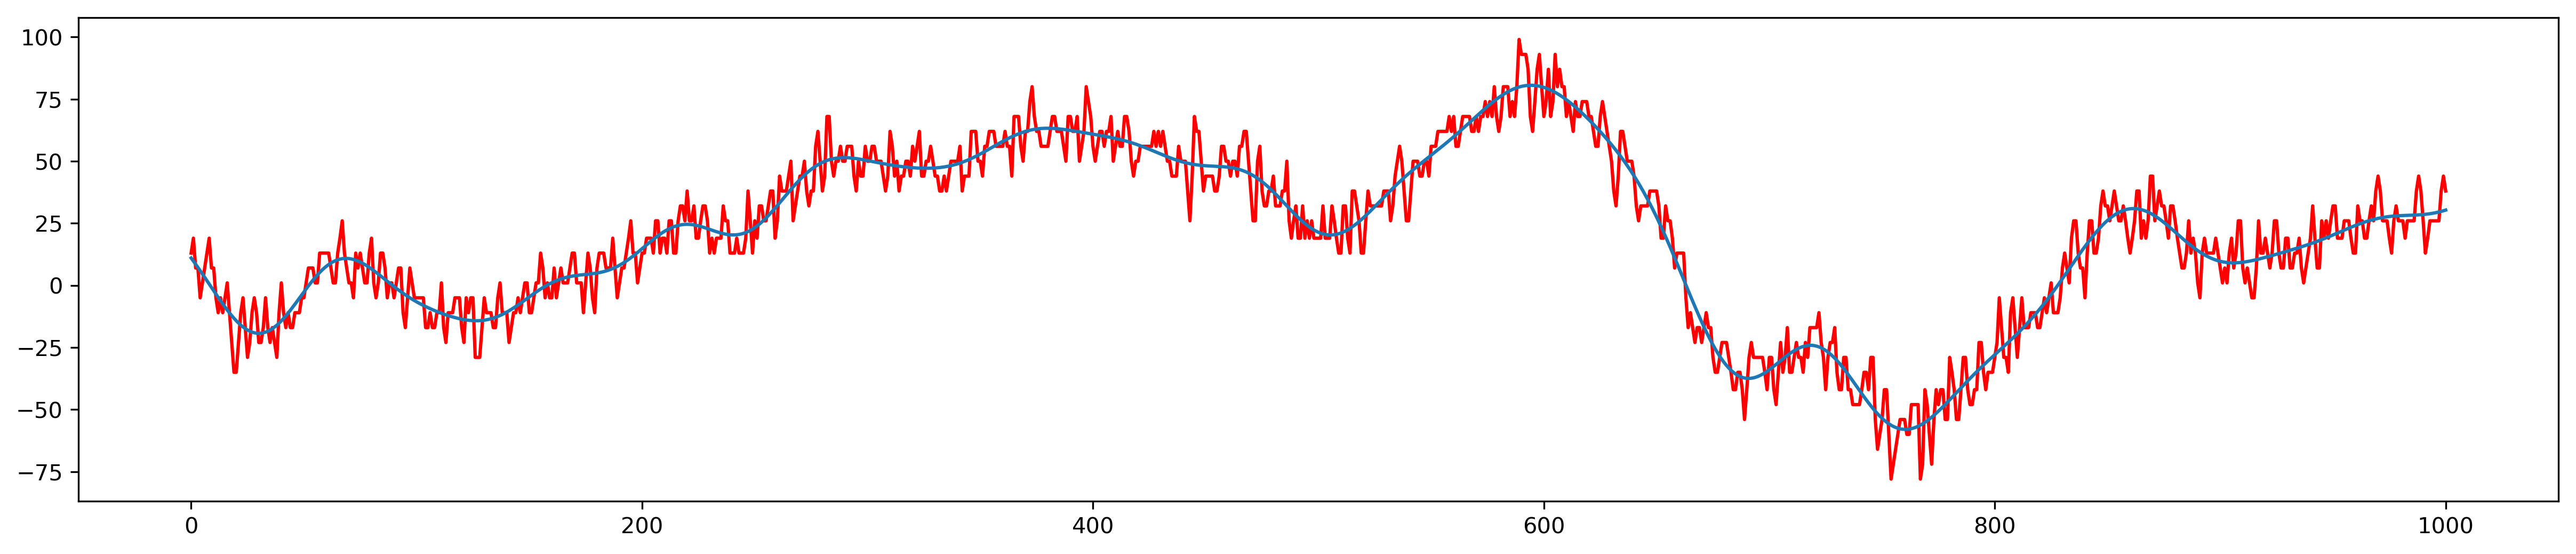

In [14]:
plt.figure(figsize=(20,4), dpi=300)
plt.plot(x0[startpoint:endpoint], c='red')
plt.plot(x1[startpoint:endpoint])

◼️x0(赤)とx2(青)のデータのグラフ：

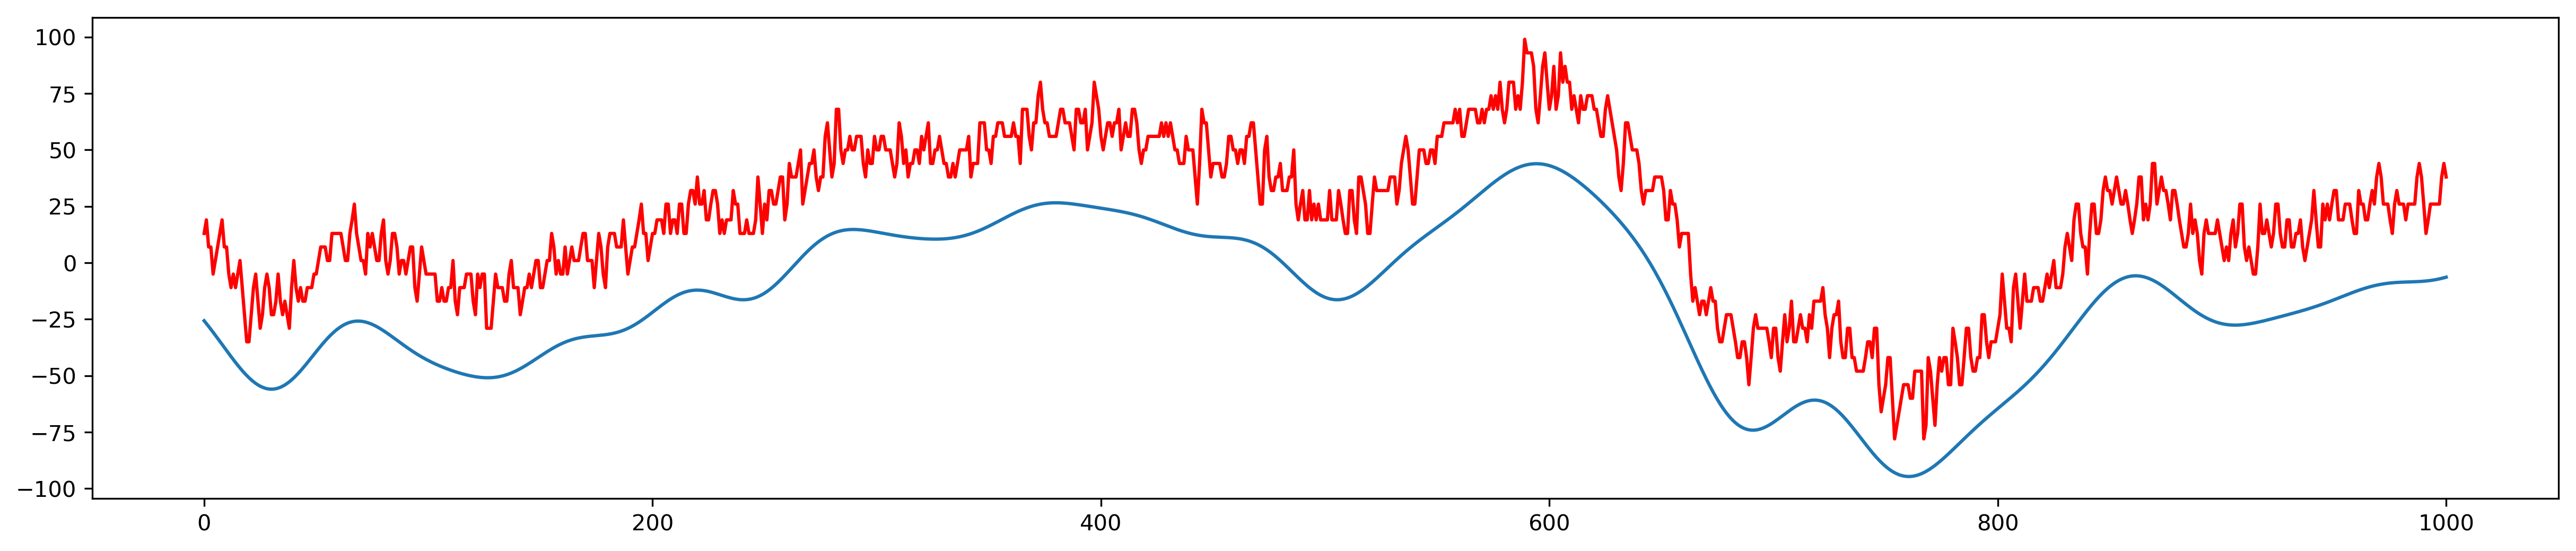

In [15]:
plt.figure(figsize=(20,4), dpi=300)
plt.plot(x0[startpoint:endpoint], c='red')
plt.plot(x2[startpoint:endpoint])